C:\Users\Ong\AppData\Local\Temp\ipykernel_194904\927681370.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_all['FLT_DATE'] = pd.to_datetime(df_all['FLT_DATE'])
C:\Users\Ong\AppData\Local\Temp\ipykernel_194904\927681370.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_totals, x='MONTH', y='FLT_TOT_1', palette='Blues_d')


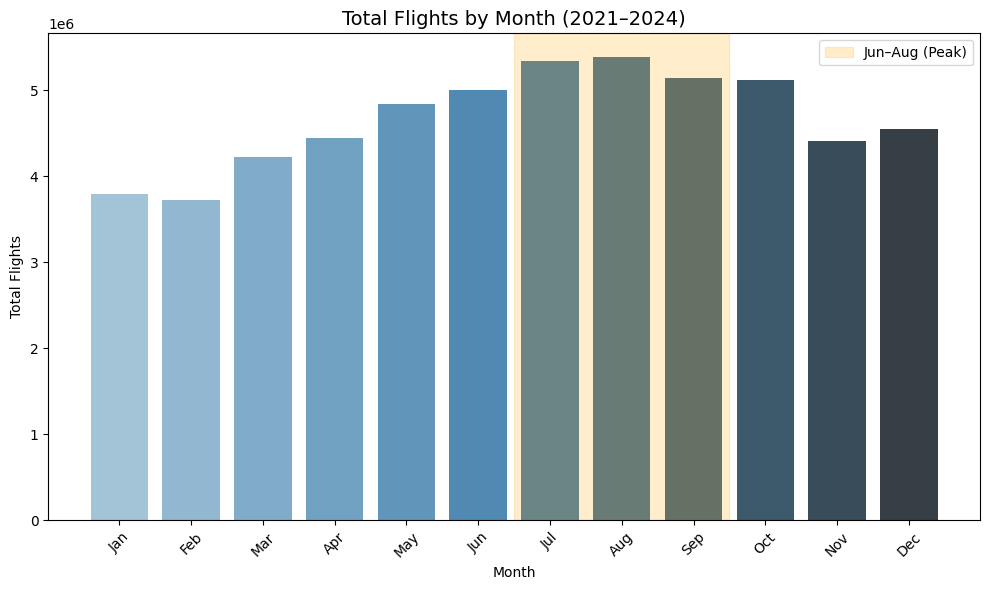

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
df_2021 = pd.read_csv("airport_traffic_2021.csv")
df_2022 = pd.read_csv("airport_traffic_2022.csv")
df_2023 = pd.read_csv("airport_traffic_2023.csv")
df_2024 = pd.read_csv("airport_traffic_2024.csv")

# Combine all years
df_all = pd.concat([df_2021, df_2022, df_2023, df_2024], ignore_index=True)

# Parse dates
df_all['FLT_DATE'] = pd.to_datetime(df_all['FLT_DATE'])
df_all['MONTH'] = df_all['FLT_DATE'].dt.month

# Group by month and sum total flights
monthly_totals = df_all.groupby('MONTH')['FLT_TOT_1'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_totals, x='MONTH', y='FLT_TOT_1', palette='Blues_d')

# Highlight only June–August
plt.axvspan(5.5, 8.5, color='orange', alpha=0.2, label='Jun–Aug (Peak)')

plt.title('Total Flights by Month (2021–2024)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Flights')
plt.xticks(range(0, 12), [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
